<a href="https://colab.research.google.com/github/kaitnam/TIL/blob/master/Tokyo_Olympics_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import math
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Medals.xlsx to Medals.xlsx


In [3]:
df = pd.read_excel('Medals.xlsx')
df.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [4]:
df.shape

(93, 7)

In [5]:
df.columns

Index(['Rank', 'Team/NOC', 'Gold', 'Silver', 'Bronze', 'Total',
       'Rank by Total'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           93 non-null     int64 
 1   Team/NOC       93 non-null     object
 2   Gold           93 non-null     int64 
 3   Silver         93 non-null     int64 
 4   Bronze         93 non-null     int64 
 5   Total          93 non-null     int64 
 6   Rank by Total  93 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 5.2+ KB


In [7]:
df.isnull().sum()

Rank             0
Team/NOC         0
Gold             0
Silver           0
Bronze           0
Total            0
Rank by Total    0
dtype: int64

In [8]:
df.describe()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


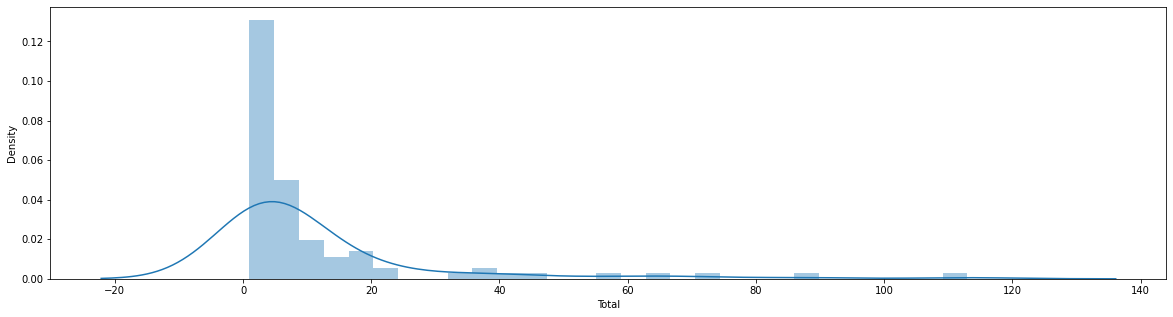

In [9]:
# Histogram
f, ax = plt.subplots(figsize=(20,5))
sns.distplot(df['Total'])

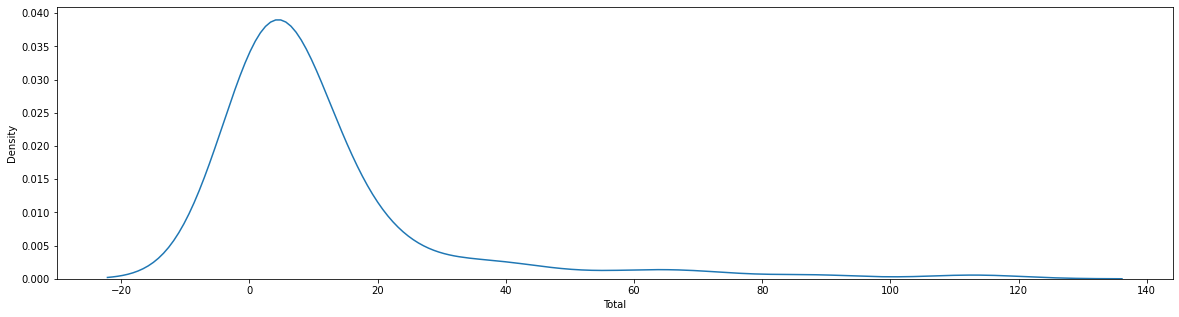

In [10]:
# KDE plot
# 데이터로 차트를 그릴 때 분포가 안 보이기 때문에 막대 그래프만으로는 한계가 있다. 
# 이럴때 커널 밀도 추정(KDE: Kernel Density Estimator)를 사용한다.
 
f, ax = plt.subplots(figsize=(20,5))
sns.kdeplot(df['Total'])

Text(0.5, 1.0, 'Correlation Heatmap')

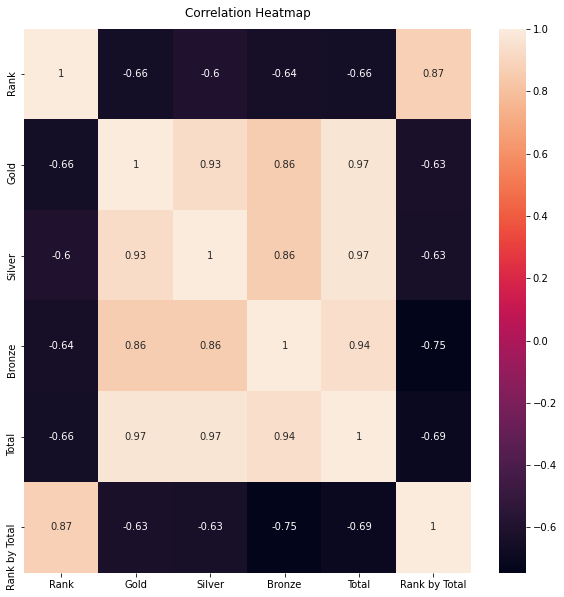

In [11]:
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(df.corr(),annot=True)
heatmap.set_title('Correlation Heatmap',fontdict={'fontsize':12}, pad=12)

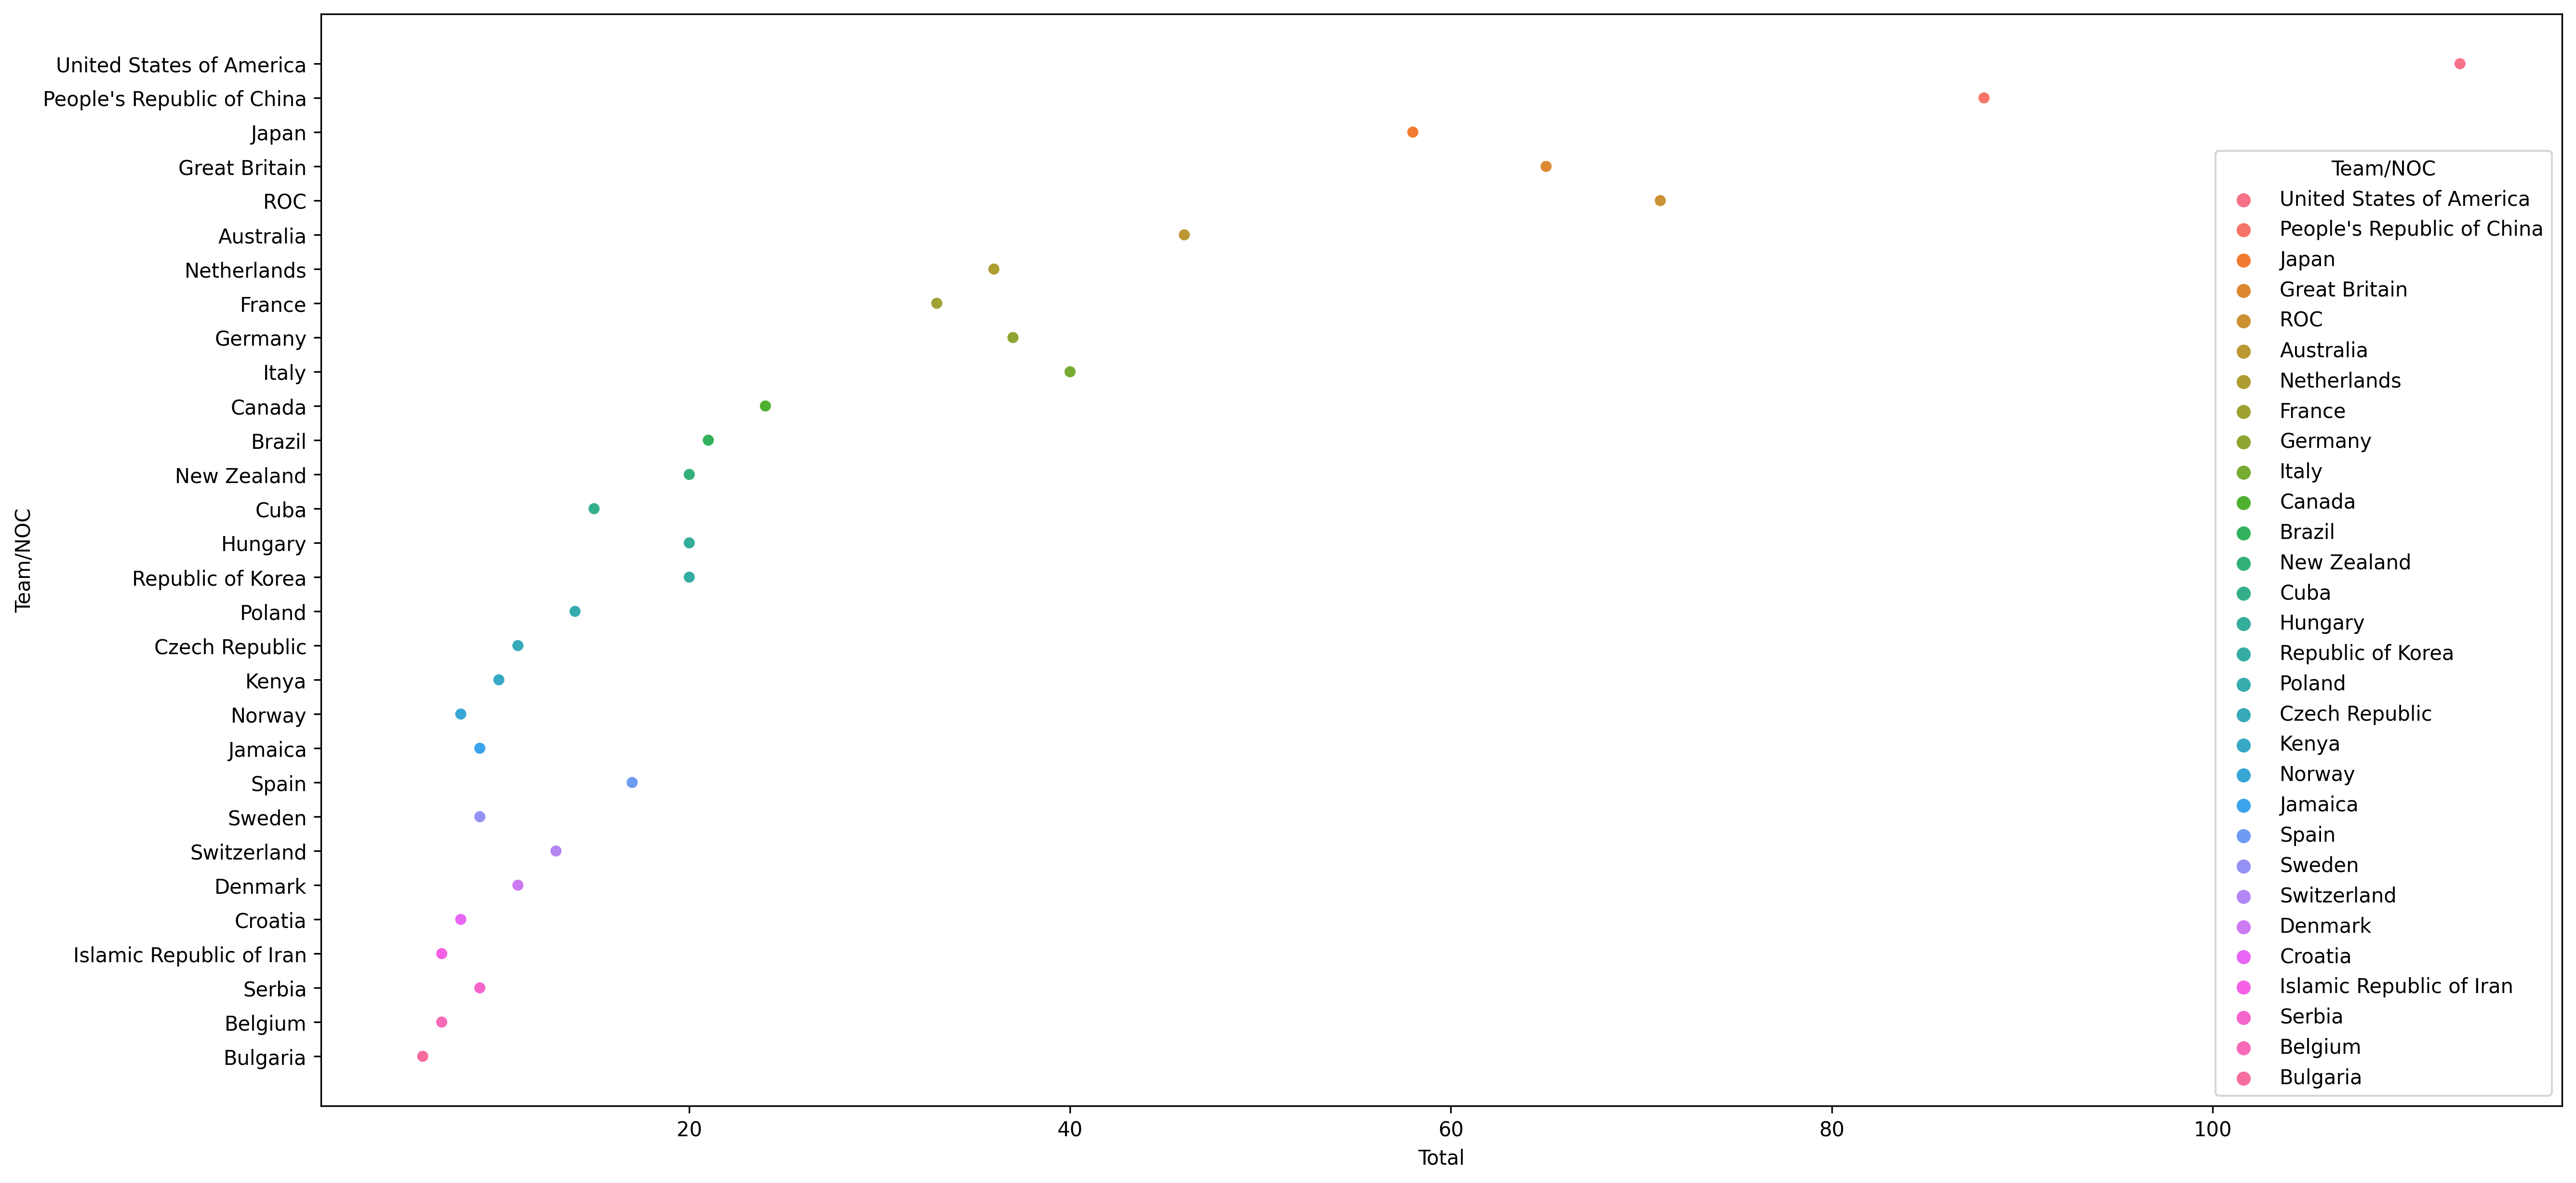

In [13]:
plt.figure(figsize=(20,10),dpi=300)
sns.scatterplot(x='Total', y='Team/NOC', hue='Team/NOC', data=df[:30])

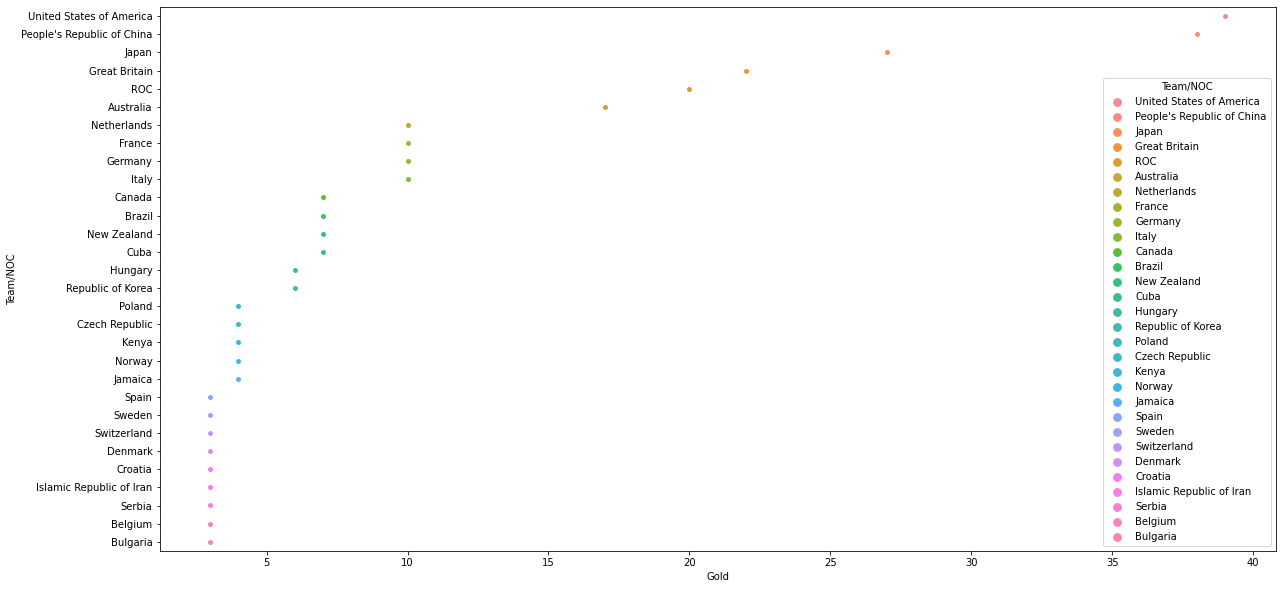

In [16]:
# warmplot은 데이터가 모여있는 곳을 잘 보여준다.

plt.figure(figsize=(20,10))
sns.swarmplot(x='Gold', y='Team/NOC', hue='Team/NOC', data=df[:30])

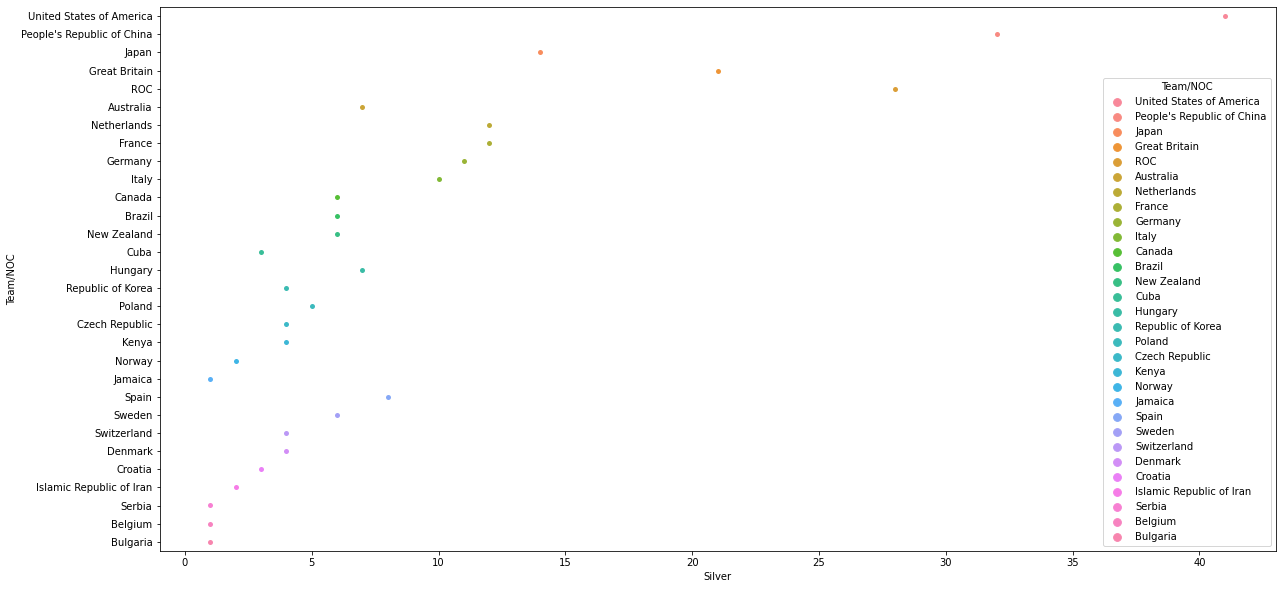

In [17]:
plt.figure(figsize=(20,10))
sns.swarmplot(x='Silver', y='Team/NOC', hue='Team/NOC', data=df[:30])

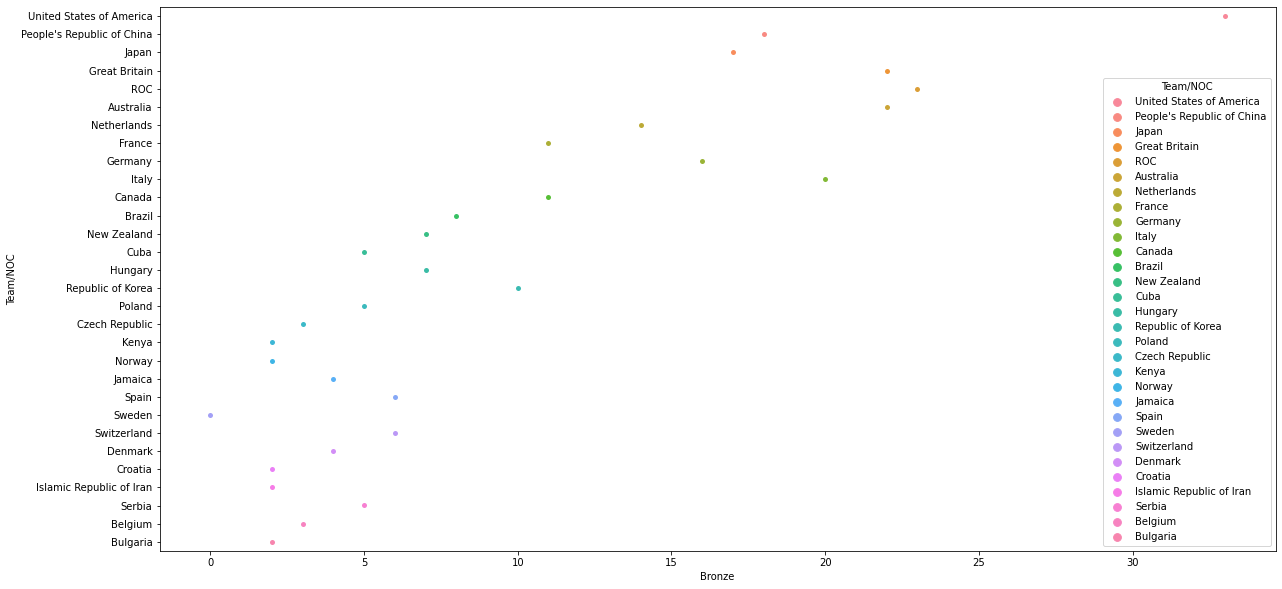

In [18]:
plt.figure(figsize=(20,10))
sns.swarmplot(x='Bronze', y='Team/NOC', hue='Team/NOC', data=df[:30])

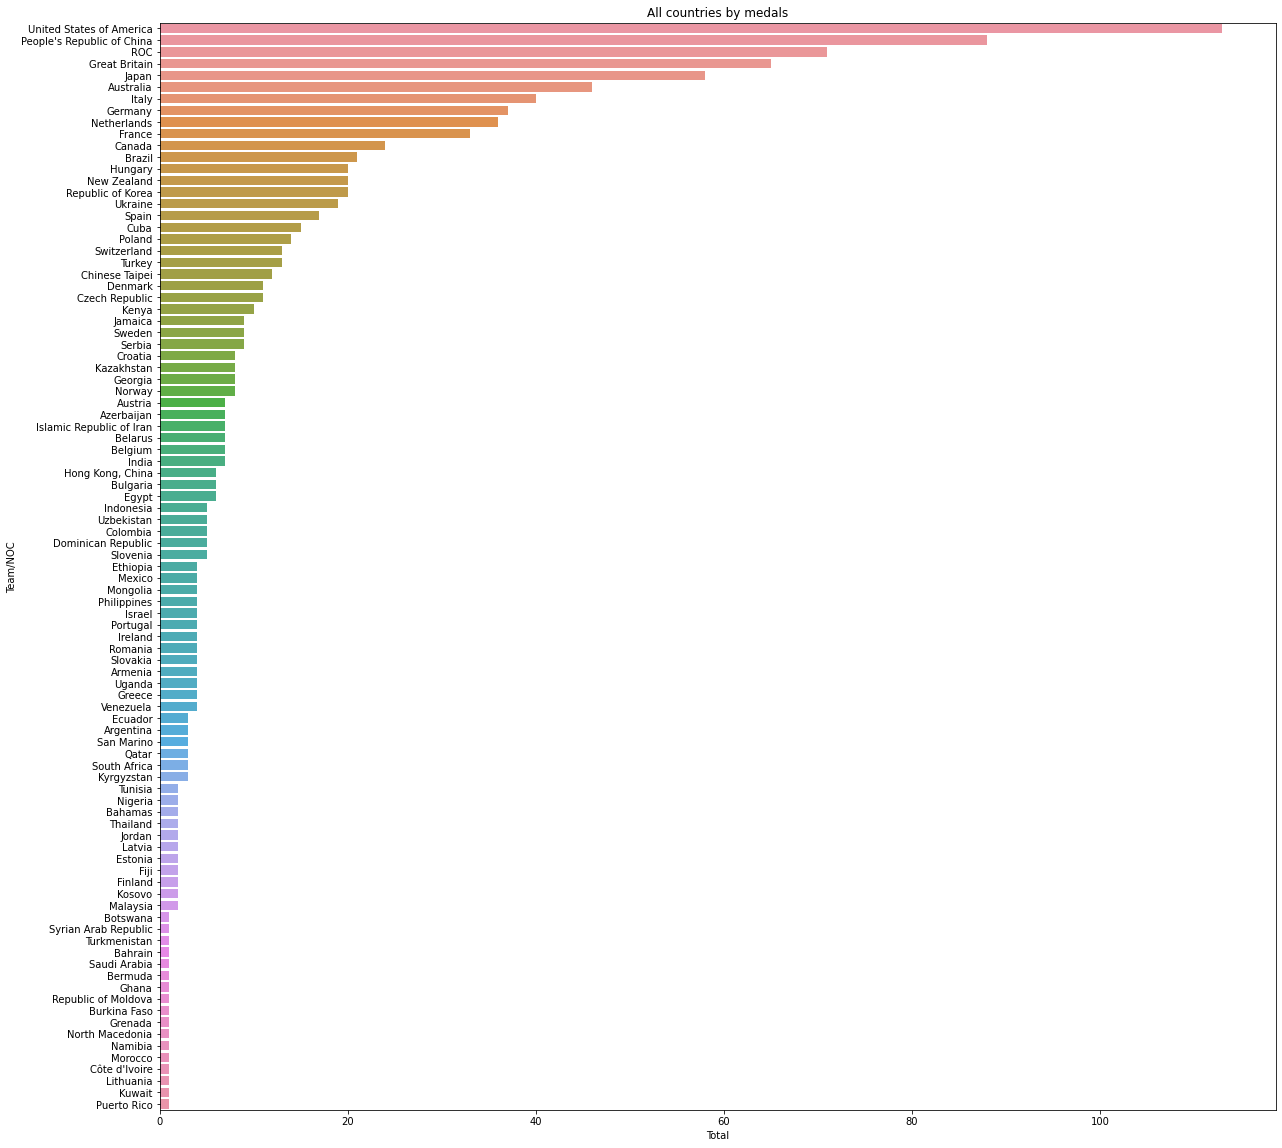

In [25]:
plt.figure(figsize=(20, 20))
plt.tight_layout()
plot_order = df.groupby('Team/NOC')['Total'].sum().sort_values(ascending=False).index.values
sns.barplot(x='Total',y='Team/NOC',data=df, order=plot_order)
plt.title('All countries by medals')
plt.show()


#plot_order = death.groupby('Cause Name')['Deaths'].sum().sort_values(ascending=False).index.values

#sns.catplot(data=death, x='Cause Name',  y='Deaths',kind='bar',ci=None, legend_out=False, order=plot_order)